In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.svm import SVR


In [ ]:
df = sns.load_dataset('mpg')
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
df.duplicated().any()

False

In [ ]:
df.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [ ]:
df['horsepower'].isnull().sum()

6

In [ ]:
df.dropna(inplace = True) 

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


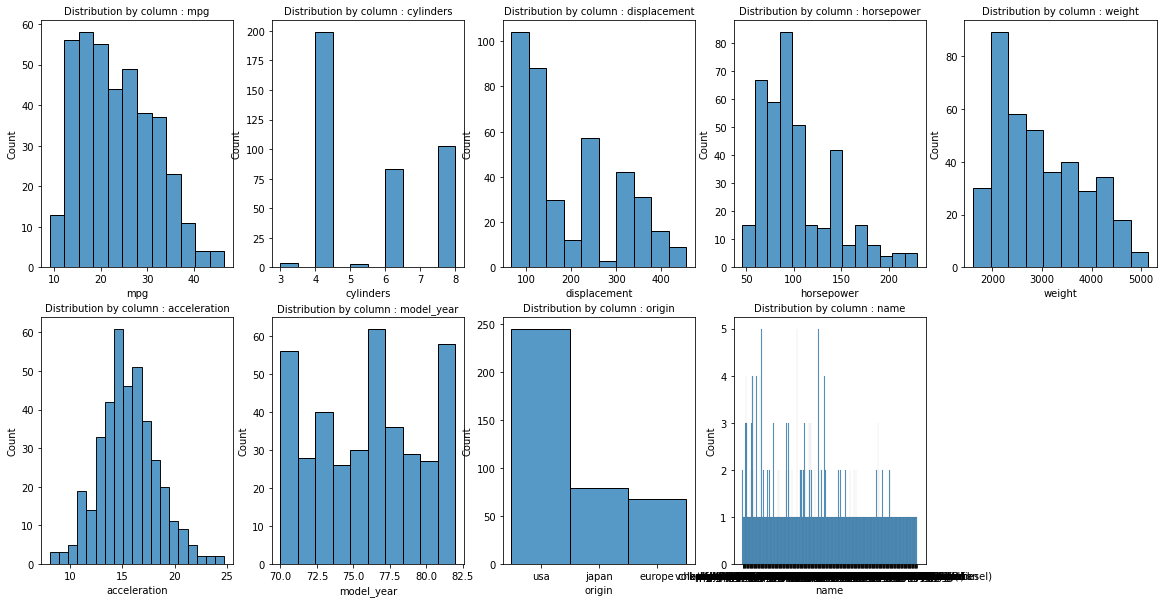

In [ ]:
plt.figure(figsize=(20,10))
for index, column in enumerate(df.columns):
    plt.subplot(2,5,index+1)
    sns.histplot(df[column])
    plt.title(f"Distribution by column : {column}", fontsize=10)
plt.show()

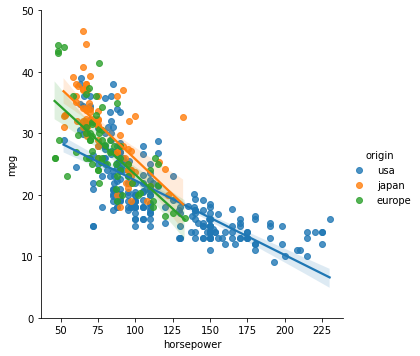

In [ ]:
var = 'horsepower'
plot = sns.lmplot(var,'mpg',data=df, hue = 'origin')
plot.set(ylim = (0,50));

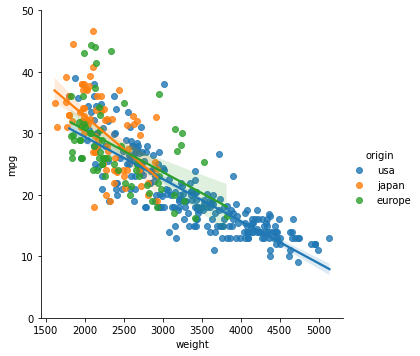

In [ ]:
var = 'weight'
plot = sns.lmplot(var,'mpg',data=df, hue = 'origin')
plot.set(ylim = (0,50));

In [ ]:
X = df[['horsepower', 'weight']]
y = df['mpg']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=100)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
rbf_model = SVR()
rbf_model.fit(X_train_scaled,y_train)
rbf_y_pred = rbf_model.predict(X_test_scaled)
rbf_score = rbf_model.score(X_test_scaled,y_test)
rbf_params = rbf_model.get_params()
rbf_intercept = rbf_model.intercept_

In [ ]:
linear_model = SVR(kernel='linear')
linear_model.fit(X_train_scaled,y_train)
linear_y_pred = linear_model.predict(X_test_scaled)
linear_score = linear_model.score(X_test_scaled,y_test)
linear_score

0.6901353998442641

In [ ]:
linear_params = linear_model.get_params()
linear_intercept = linear_model.intercept_
linear_params

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
linear_model.coef_

array([[-2.1429963 , -4.34918913]])

In [ ]:
sigmoid_model = SVR(kernel = 'sigmoid')
sigmoid_model.fit(X_train_scaled,y_train)
sigmoid_y_pred = sigmoid_model.predict(X_test_scaled)
sigmoid_score = sigmoid_model.score(X_test_scaled,y_test)
sigmoid_params = sigmoid_model.get_params()
sigmoid_intercept = sigmoid_model.intercept_

In [ ]:
sigmoid_score

-0.2904828192184956

In [ ]:
sigmoid_params

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'sigmoid',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

ValueError: ignored

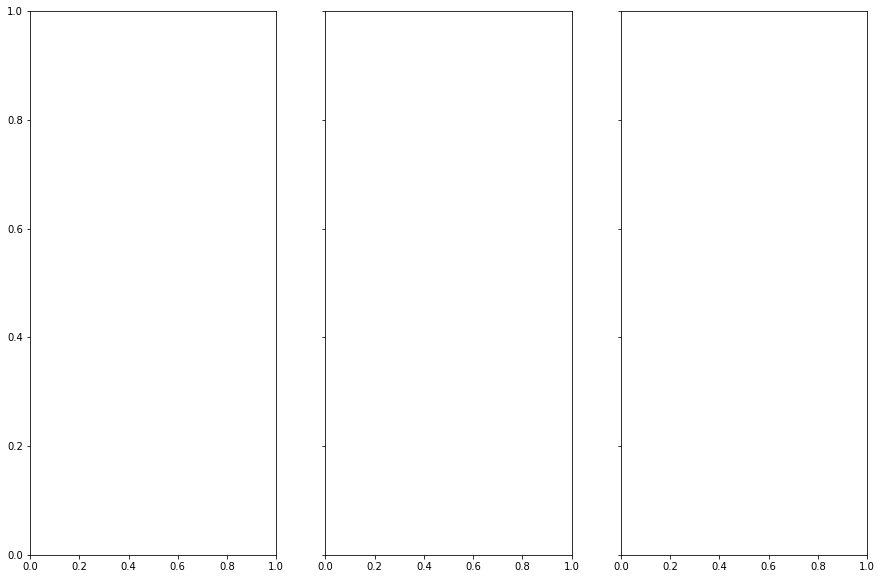

In [ ]:
lw = 2

svrs = [rbf_model, linear_model, sigmoid_model]
kernel_label = ["RBF", "Linear", "Sigmoid"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X_train_scaled,
        svr.fit(X_train_scaled, y_train).predict(X_test_scaled),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X_train_scaled[svr.support_],
        y_train[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X_train_scaled[np.setdiff1d(np.arange(len(X_train_scaled)), svr.support_)],
        y_train[np.setdiff1d(np.arange(len(X_train_scaled)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()